In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
path = "./../MICS6_2019_Stats Day Competition/Datasets/hh_Household_Stat_Day.xlsx"
dataset = pd.read_excel(path)

In [2]:
# HH7 - Region
# HH6 - Area
# helevel - education level of household head
# 0	Pre-primary or none
# 1	Primary
# 2	Seconday
# 3	Higher
# 9	Missing/Dk
# HHSEX - sex
selected_columns = ["HH7", "HH6", "helevel", "HHSEX"]
temp = dataset[selected_columns]
df_0 = temp[temp["helevel"].notna() &
            temp["HHSEX"].notna()]
# temp.info()
# df_0.info()
df_0 = df_0[df_0["helevel"] != 9]

In [3]:
df_helevel = df_0[["HH7", "HH6", "helevel"]].groupby(
    by=["HH7", "HH6", "helevel"])["helevel"].count()
graph_data = pd.DataFrame(df_helevel)
graph_data.rename(columns={"helevel": "education_level_count"}, inplace=True)
graph_data.reset_index(inplace=True)
graph_data

,HH7,HH6,helevel,education_level_count
0,1,1,0.0,15
1,1,1,1.0,71
2,1,1,2.0,56
3,1,1,3.0,4
4,1,2,0.0,31
...,...,...,...,...
62,10,1,2.0,317
63,10,1,3.0,98
64,10,2,1.0,12
65,10,2,2.0,72


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


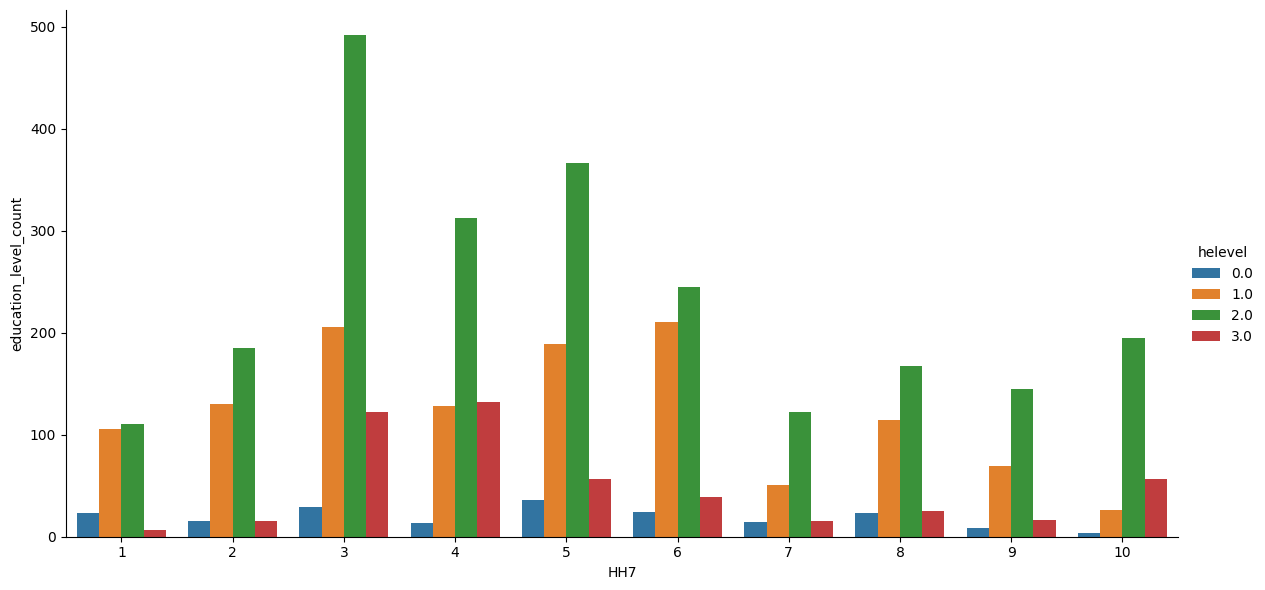

In [4]:
ax = sns.catplot(
    data=graph_data,
    x="HH7",
    y="education_level_count",
    hue="helevel",
    kind="bar",
    height=6,
    aspect=2,
    errorbar=None
)

In [5]:
respondents_per_region = graph_data[[
    "HH7", "education_level_count"]].groupby(by="HH7").sum()
respondents_per_region.reset_index(inplace=True)
respondents_per_region

,HH7,education_level_count
0,1,492
1,2,692
2,3,849
3,4,1172
4,5,649
5,6,1038
6,7,404
7,8,329
8,9,479
9,10,559


In [6]:
# each education level in each region by percentage of total respondents in the region
def get_region_total(region_number):
    region_total = respondents_per_region[respondents_per_region["HH7"]
                                          == region_number]["education_level_count"].values[0]
    return region_total


df_1 = graph_data[["HH7", "helevel", "education_level_count"]].groupby(
    by=["HH7", "helevel"]).sum()
df_1.reset_index(inplace=True)
# get_region_total(5)
df_1["education_level_count_by_region_respondent_total"] = df_1.apply(
    lambda x: x["education_level_count"]/get_region_total(x["HH7"]), axis=1)
df_1

,HH7,helevel,education_level_count,education_level_count_by_region_respondent_total
0,1,0.0,46,0.093496
1,1,1.0,211,0.428862
2,1,2.0,221,0.449187
3,1,3.0,14,0.028455
4,2,0.0,30,0.043353
5,2,1.0,261,0.377168
6,2,2.0,370,0.534682
7,2,3.0,31,0.044798
8,3,0.0,29,0.034158
9,3,1.0,206,0.242638


In [7]:
# respondent_education_level_averages
total_respondents = graph_data["education_level_count"].sum()
rel_pre_primary_or_none = graph_data[graph_data["helevel"]
                                     == 0.0]["education_level_count"].sum()/total_respondents

rel_primary = graph_data[graph_data["helevel"]
                         == 1.0]["education_level_count"].sum()/total_respondents
rel_secondary = graph_data[graph_data["helevel"]
                           == 2.0]["education_level_count"].sum()/total_respondents
rel_higher = graph_data[graph_data["helevel"]
                        == 3.0]["education_level_count"].sum()/total_respondents

/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(29.14062500000002, 0.5, 'Education Level as a share of total respondents in the region')

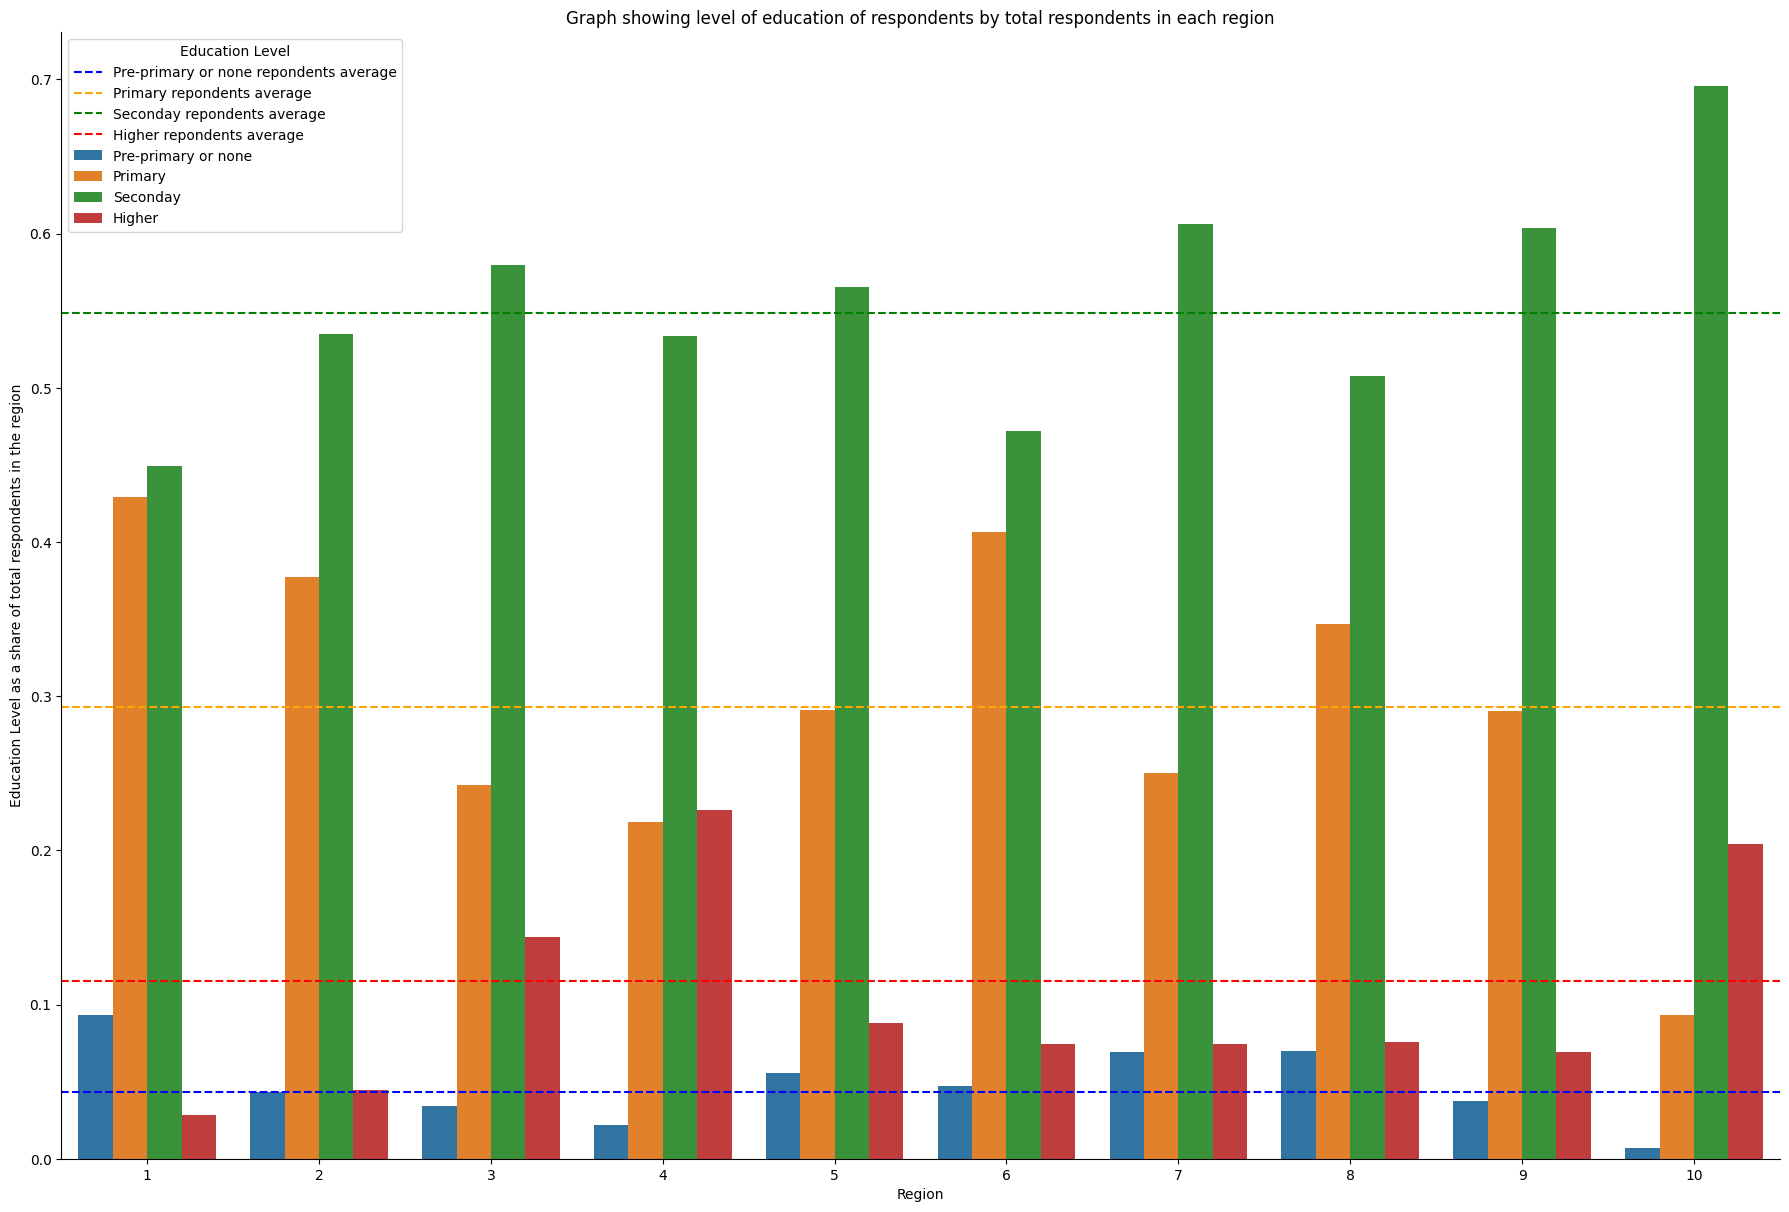

In [8]:
g = sns.catplot(
    data=df_1,
    x="HH7",
    y="education_level_count_by_region_respondent_total",
    hue="helevel",
    kind="bar",
    height=12,
    aspect=1.5,
    errorbar=None,
    legend=None
)
g.refline(y=rel_pre_primary_or_none, color="blue")
g.refline(y=rel_primary, color="orange")
g.refline(y=rel_secondary, color="green")
g.refline(y=rel_higher, color="red")
plt.legend(loc='upper left', title="Education Level", labels=[
    "Pre-primary or none repondents average",
    "Primary repondents average",
    "Seconday repondents average",
    "Higher repondents average",
    "Pre-primary or none",
    "Primary",
    "Seconday",
    "Higher",
])
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Graph showing level of education of respondents by total respondents in each region")
plt.xlabel("Region")
plt.ylabel("Education Level as a share of total respondents in the region")


# ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
# for c in ax.containers:
#    labels = [f'{(v.get_height() *100):.1f}' for v in c]
#    ax.bar_label(c, labels=labels, label_type='edge')

## URBAN


In [9]:
# each education level in each region by percentage of total respondents in the region
def get_region_total_urban(region_number):
    region_total = urban_respondents_per_region[urban_respondents_per_region["HH7"]
                                                == region_number]["education_level_count"].values[0]
    return region_total


df_2 = graph_data[["HH7", "HH6", "helevel", "education_level_count"]].groupby(
    by=["HH7", "HH6", "helevel"]).sum()
df_2.reset_index(inplace=True)
df_2 = df_2[df_2["HH6"] == 1]
# get_region_total(5)
# df_1["education_level_count_by_region_respondent_total"] = df_1.apply(
#    lambda x: x["education_level_count"]/get_region_total(x["HH7"]), axis=1)
urban_respondents_per_region = df_2[["HH7", "education_level_count"]].groupby(by=[
                                                                              "HH7"]).sum()

urban_respondents_per_region.reset_index(inplace=True)
urban_respondents_per_region

df_2["urban_education_level_count_by_region_respondent_total"] = df_2.apply(
    lambda x: x["education_level_count"]/get_region_total_urban(x["HH7"]), axis=1)

df_2

,HH7,HH6,helevel,education_level_count,urban_education_level_count_by_region_respondent_total
0,1,1,0.0,15,0.102740
1,1,1,1.0,71,0.486301
2,1,1,2.0,56,0.383562
3,1,1,3.0,4,0.027397
8,2,1,0.0,6,0.031250
9,2,1,1.0,53,0.276042
10,2,1,2.0,122,0.635417
11,2,1,3.0,11,0.057292
20,4,1,0.0,3,0.006494
21,4,1,1.0,60,0.129870


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(29.14062500000002, 0.5, 'Education Level as a share of total respondents in the region')

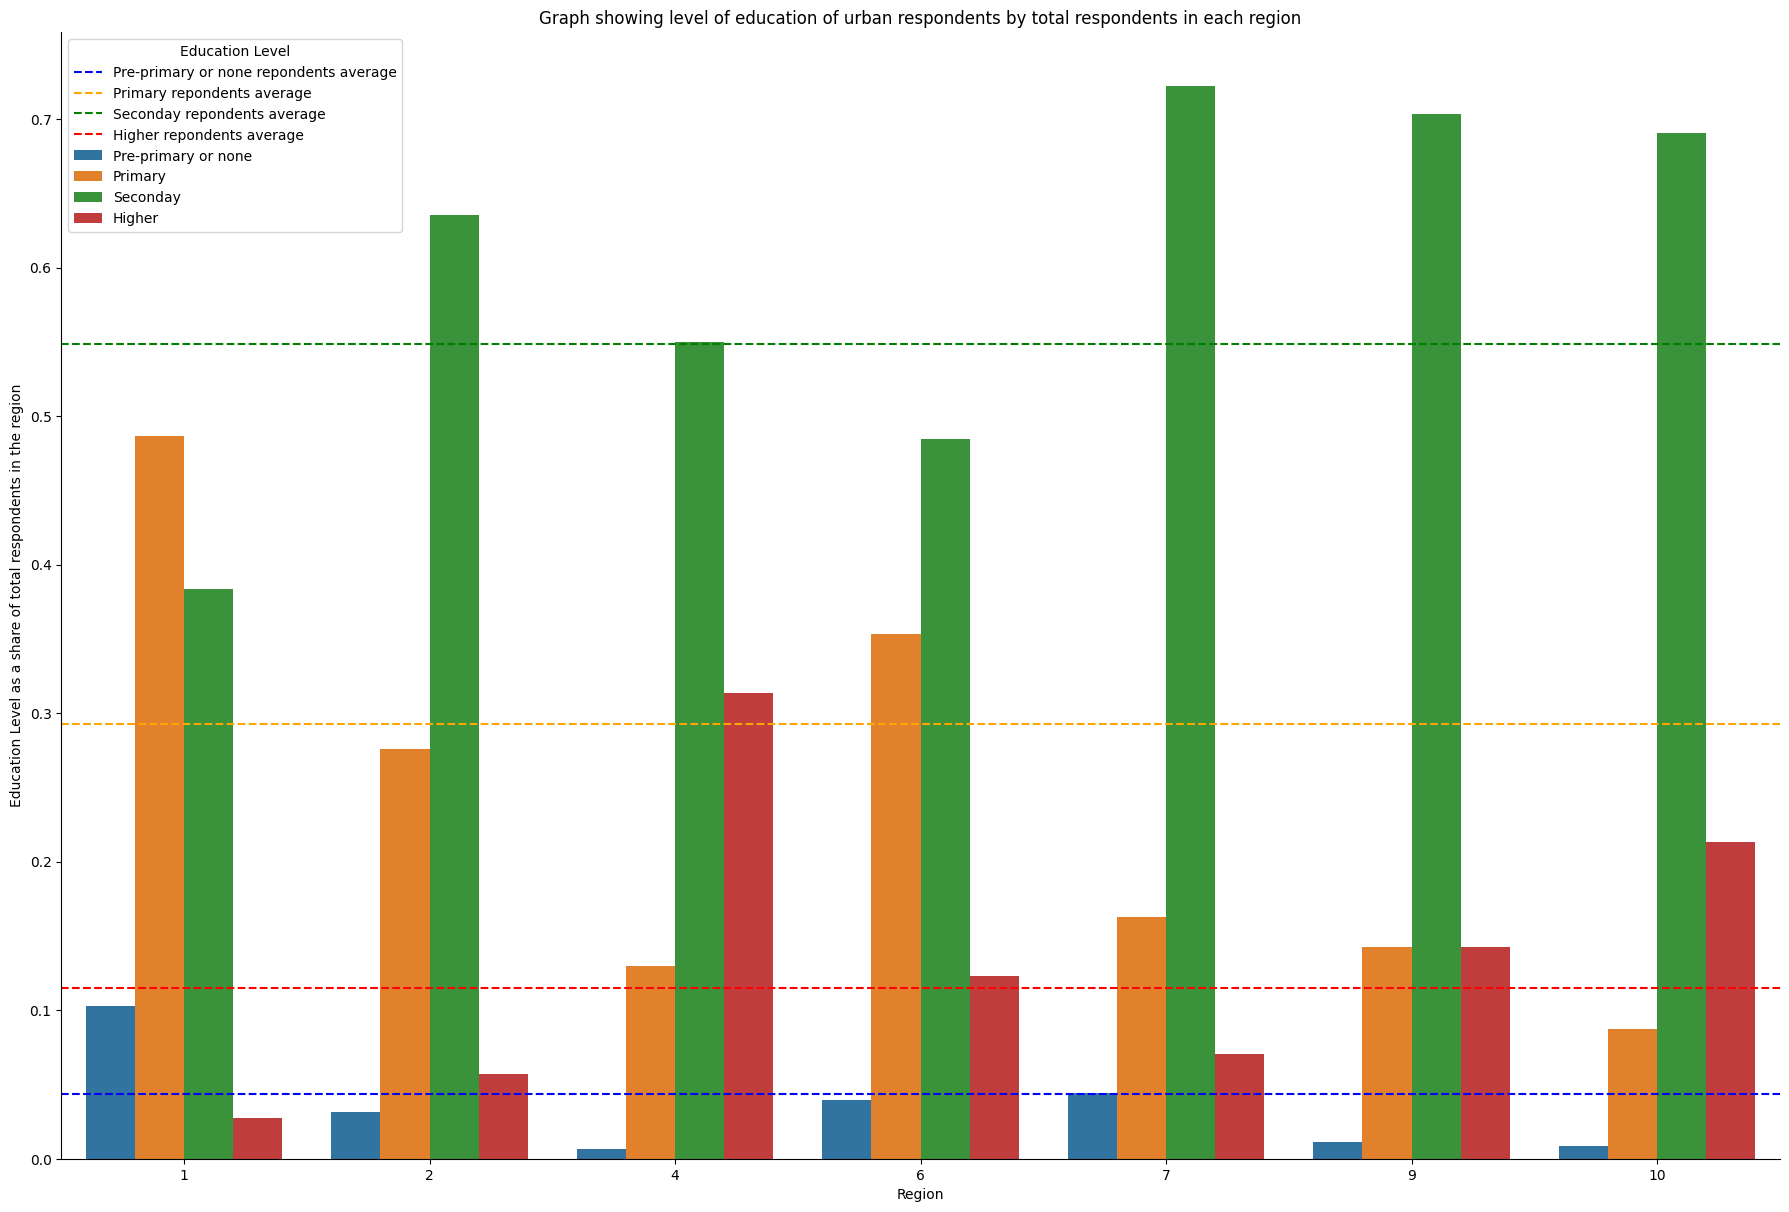

In [10]:
g2 = sns.catplot(
    data=df_2,
    x="HH7",
    y="urban_education_level_count_by_region_respondent_total",
    hue="helevel",
    kind="bar",
    height=12,
    aspect=1.5,
    errorbar=None,
    legend=None
)
g2.refline(y=rel_pre_primary_or_none, color="blue")
g2.refline(y=rel_primary, color="orange")
g2.refline(y=rel_secondary, color="green")
g2.refline(y=rel_higher, color="red")
plt.legend(loc='upper left', title="Education Level", labels=[
    "Pre-primary or none repondents average",
    "Primary repondents average",
    "Seconday repondents average",
    "Higher repondents average",
    "Pre-primary or none",
    "Primary",
    "Seconday",
    "Higher",
])
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Graph showing level of education of urban respondents by total respondents in each region")
plt.xlabel("Region")
plt.ylabel("Education Level as a share of total respondents in the region")

## RURAL


In [11]:
# each education level in each region by percentage of total respondents in the region
def get_region_total_rural(region_number):
    region_total = rural_respondents_per_region[rural_respondents_per_region["HH7"]
                                                == region_number]["education_level_count"].values[0]
    return region_total


df_3 = graph_data[["HH7", "HH6", "helevel", "education_level_count"]].groupby(
    by=["HH7", "HH6", "helevel"]).sum()
df_3.reset_index(inplace=True)
df_3 = df_3[df_3["HH6"] == 2]
# get_region_total(5)
# df_1["education_level_count_by_region_respondent_total"] = df_1.apply(
#    lambda x: x["education_level_count"]/get_region_total(x["HH7"]), axis=1)
rural_respondents_per_region = df_3[["HH7", "education_level_count"]].groupby(by=[
                                                                              "HH7"]).sum()

rural_respondents_per_region.reset_index(inplace=True)
rural_respondents_per_region

df_3["rural_education_level_count_by_region_respondent_total"] = df_3.apply(
    lambda x: x["education_level_count"]/get_region_total_rural(x["HH7"]), axis=1)

df_3

,HH7,HH6,helevel,education_level_count,rural_education_level_count_by_region_respondent_total
4,1,2,0.0,31,0.089595
5,1,2,1.0,140,0.404624
6,1,2,2.0,165,0.476879
7,1,2,3.0,10,0.028902
12,2,2,0.0,24,0.048000
13,2,2,1.0,208,0.416000
14,2,2,2.0,248,0.496000
15,2,2,3.0,20,0.040000
16,3,2,0.0,29,0.034158
17,3,2,1.0,206,0.242638


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(29.14062500000002, 0.5, 'Education Level as a share of total respondents in the region')

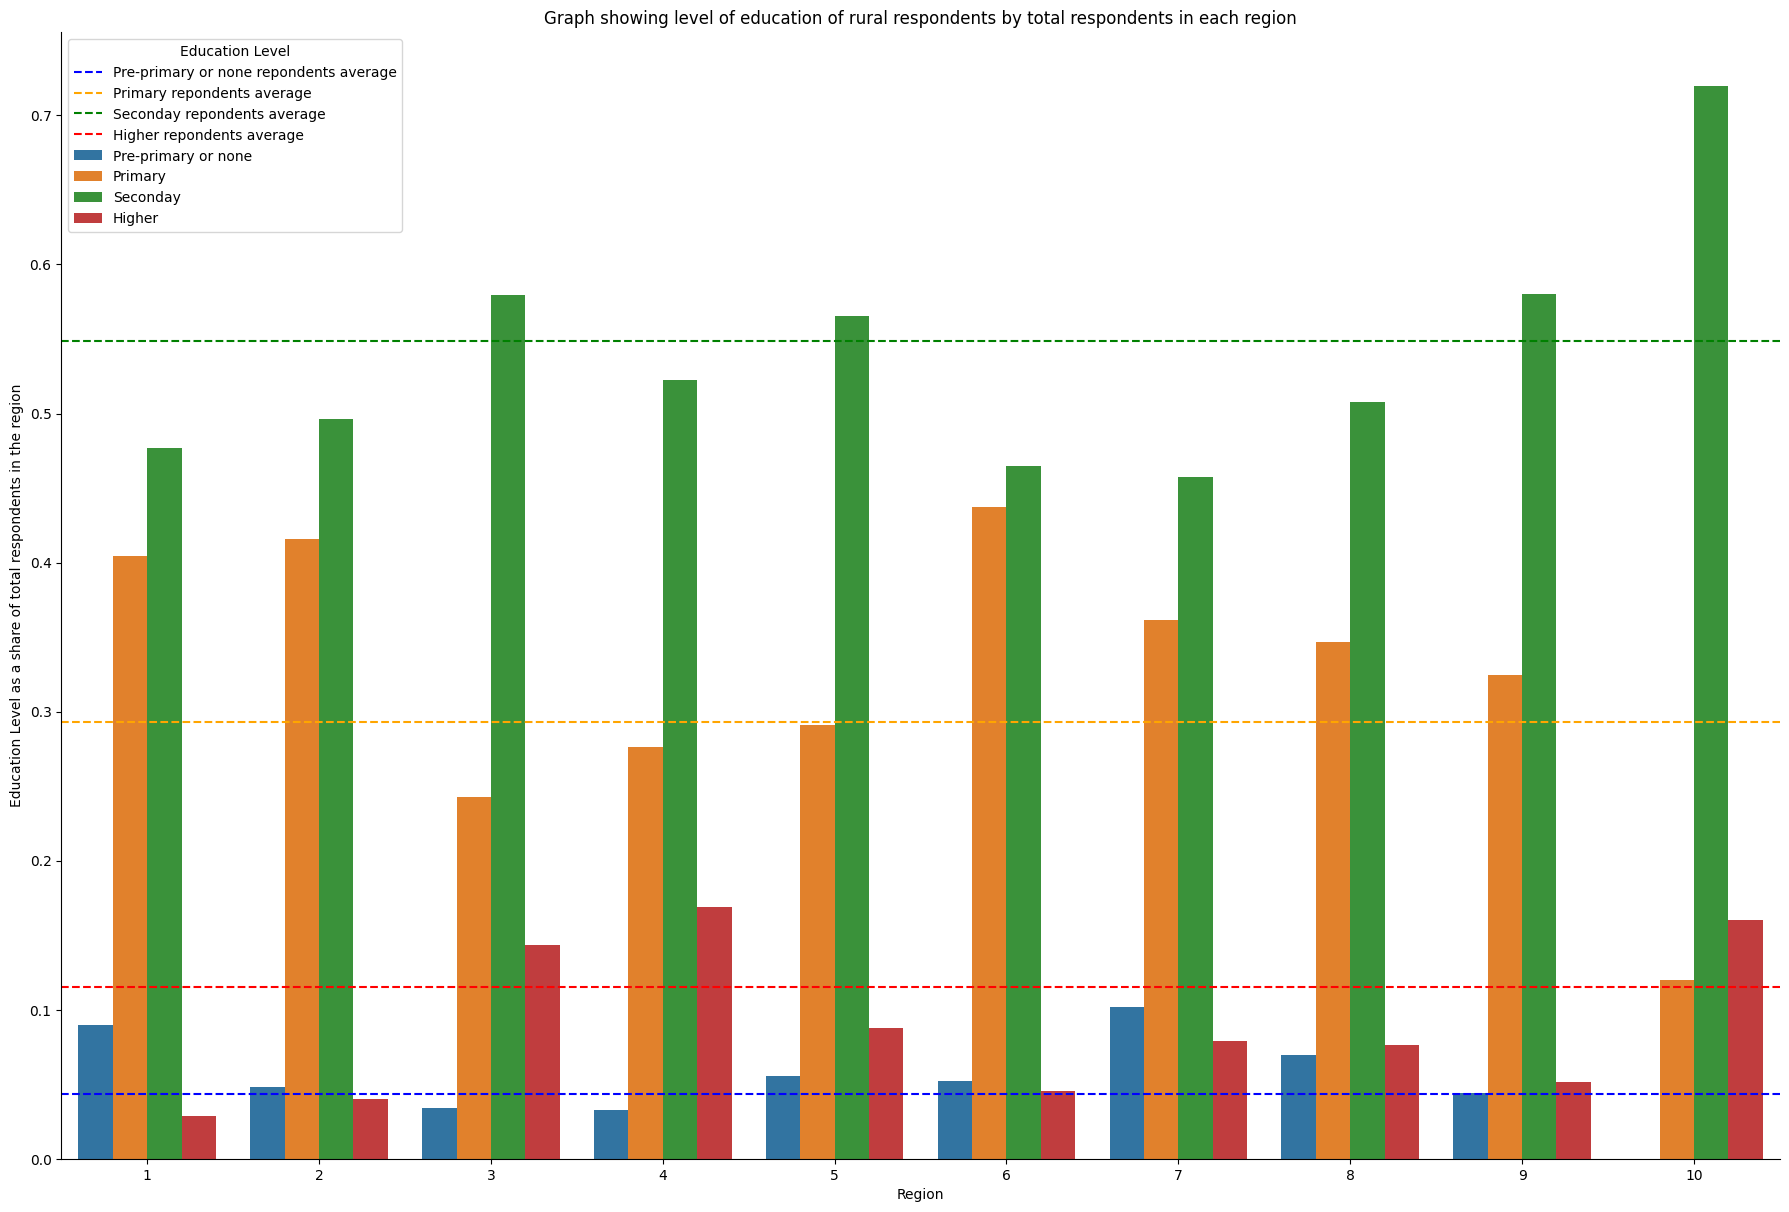

In [12]:
g3 = sns.catplot(
    data=df_3,
    x="HH7",
    y="rural_education_level_count_by_region_respondent_total",
    hue="helevel",
    kind="bar",
    height=12,
    aspect=1.5,
    errorbar=None,
    legend=None
)
g3.refline(y=rel_pre_primary_or_none, color="blue")
g3.refline(y=rel_primary, color="orange")
g3.refline(y=rel_secondary, color="green")
g3.refline(y=rel_higher, color="red")
plt.legend(loc='upper left', title="Education Level", labels=[
    "Pre-primary or none repondents average",
    "Primary repondents average",
    "Seconday repondents average",
    "Higher repondents average",
    "Pre-primary or none",
    "Primary",
    "Seconday",
    "Higher",
])
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Graph showing level of education of rural respondents by total respondents in each region")
plt.xlabel("Region")
plt.ylabel("Education Level as a share of total respondents in the region")